<a href="https://colab.research.google.com/github/mobinym/Exercises/blob/main/dl_seasion2_j5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
torch.cuda.is_available()

True

In [ ]:
!nvidia-smi

Sat Jan 18 10:13:44 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [9]:
a = torch.tensor(3.5)
b = torch.tensor(3.5 ,requires_grad=False)
x = torch.tensor(3.5 ,requires_grad=True)


y= x**2
y.backward()
print(x.data)
print(x.grad)
print(x.requires_grad)


tensor(3.5000)
tensor(7.)
True


In [10]:
a = torch.tensor(4.)
b = torch.tensor(6.)
x = torch.tensor(3. , requires_grad=True)

y = a*x**2+b
y.backward()

print(f"a.data {a.data}")
print(f"a.grad {a.grad}")
print(f"a.requires_grad {a.requires_grad}")

print(f"b.data {b.data}")
print(f"b.grad {b.grad}")
print(f"b.requires_grad {b.requires_grad}")

print(f"x.data {x.data}")
print(f"x.grad {x.grad}")
print(f"x.requires_grad {x.requires_grad}")

a.data 4.0
a.grad None
a.requires_grad False
b.data 6.0
b.grad None
b.requires_grad False
x.data 3.0
x.grad 24.0
x.requires_grad True


In [11]:
w = torch.tensor(4.,requires_grad=True)
b = torch.tensor(2.,requires_grad=True)
x = torch.tensor(3.)


y = w*x + b
y.backward()

print(f"w.grad : {w.grad}")
print(f"b.grad : {b.grad}")

w.grad : 3.0
b.grad : 1.0


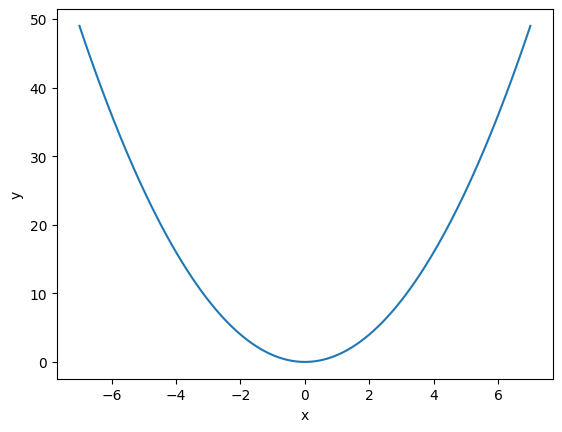

In [19]:
def func(x):
  return x**2

xlist = torch.linspace(-7,7,200)
ylist = func(xlist)

plt.plot(xlist , ylist)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [20]:
def func(x):
  return x**2

<function matplotlib.pyplot.show(close=None, block=None)>

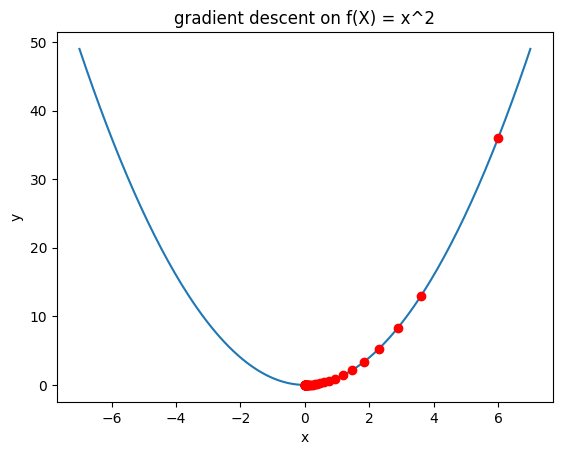

In [50]:
x = torch.tensor(6.,requires_grad=True)
N = 50
eta = 0.1
xDatas = []
func(x).backward()
for i in range(N):
  xDatas.append(x.data.item())
  func(x).backward()
  x.data = x.data - eta *x.grad
  x.grad.zero_()

yDatas = [func(torch.tensor(x)).item() for x in xDatas]
plt.plot(xlist , ylist)
plt.scatter(xDatas , yDatas , color = "red" ,label ='gradient Descent Points',zorder = 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('gradient descent on f(X) = x^2')
plt.grid = True
plt.show

In [51]:
def func2(x):
  return x**4 - 8 * x**2 - 3 * x

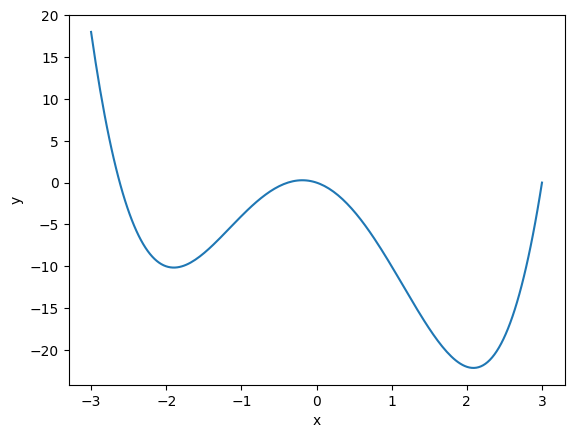

In [59]:
xlist = torch.linspace(-3 , 3 , 200)
ylist = func2(xlist)

plt.plot(xlist , ylist)
plt.xlabel('x')
plt.ylabel('y')
plt.grid= True
plt.show()

In [60]:
x = torch.tensor(3.0 , requires_grad=True)
N=50
eta = 0.006
xDatas = []
for i in range(N):
  xDatas.append(x.data.item())
  print(f"iter{i} => {x.data:.8f}", x.grad)
  func2(x).backward()
  x.data -= eta * x.grad
  x.grad.zero_()

iter0 => 3.00000000 None
iter1 => 2.65799999 tensor(0.)
iter2 => 2.48047972 tensor(0.)
iter3 => 2.37032151 tensor(0.)
iter4 => 2.29625297 tensor(0.)
iter5 => 2.24411011 tensor(0.)
iter6 => 2.20631099 tensor(0.)
iter7 => 2.17835927 tensor(0.)
iter8 => 2.15739727 tensor(0.)
iter9 => 2.14151597 tensor(0.)
iter10 => 2.12939310 tensor(0.)
iter11 => 2.12008667 tensor(0.)
iter12 => 2.11291194 tensor(0.)
iter13 => 2.10736251 tensor(0.)
iter14 => 2.10305929 tensor(0.)
iter15 => 2.09971619 tensor(0.)
iter16 => 2.09711504 tensor(0.)
iter17 => 2.09508896 tensor(0.)
iter18 => 2.09350920 tensor(0.)
iter19 => 2.09227657 tensor(0.)
iter20 => 2.09131455 tensor(0.)
iter21 => 2.09056306 tensor(0.)
iter22 => 2.08997607 tensor(0.)
iter23 => 2.08951735 tensor(0.)
iter24 => 2.08915877 tensor(0.)
iter25 => 2.08887863 tensor(0.)
iter26 => 2.08865952 tensor(0.)
iter27 => 2.08848834 tensor(0.)
iter28 => 2.08835435 tensor(0.)
iter29 => 2.08824968 tensor(0.)
iter30 => 2.08816767 tensor(0.)
iter31 => 2.08810353 ten

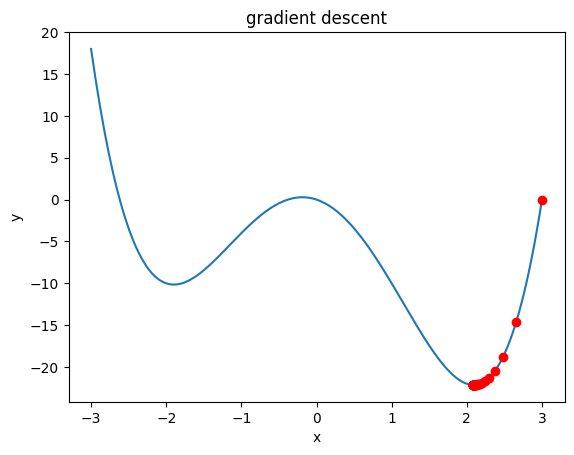

In [62]:
yDatas = [func2(torch.tensor(x)).item() for x in xDatas]
plt.plot(xlist,ylist)
plt.scatter(xDatas,yDatas,color='red',zorder=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('gradient descent')
plt.grid = True
plt.show()